In [123]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

plt.style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [124]:
# Read dataset
df = pd.read_csv('./src/McDonald_s_Reviews.csv', encoding='ISO-8859-1')
df.shape

(33396, 10)

In [125]:
# Show dataset
df.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [126]:
# Data cleansing for rating
df['rating'] = df['rating'].str[0]
df = df.head(100) 
df.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1


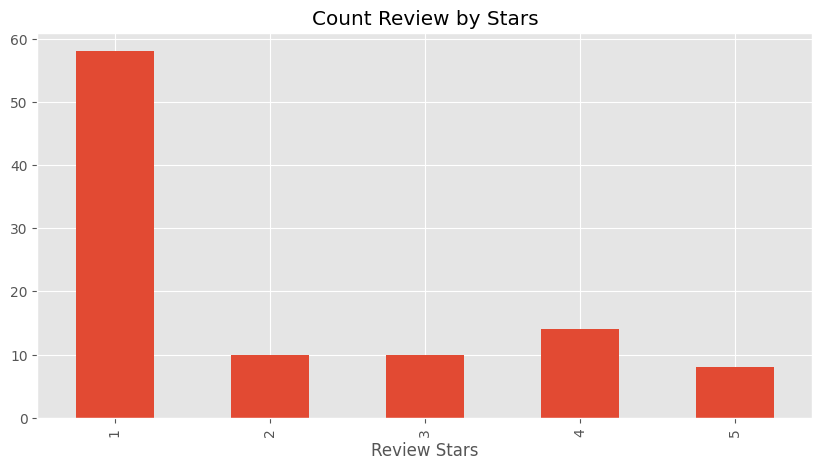

In [127]:
# EDA 
ax = df['rating'].value_counts().sort_index().plot(kind='bar', title='Count Review by Stars', figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

# NLTK (Natural Language Toolkit)

In [128]:
#  Basic NLTK
example = df['review'][20]
print(example)

Can't believe experience with order taker. Went from drive thru and employee directly asks what do you want. He keeps rushing while taking order with no other cars placing order. We wanted to add one more item and asked for a minute. He keeps asking what else. When I said we are ready - no response. There were no other car placing order that time either. I told again we are ready. responded after a pause. Again what do you want... excuse me.. who talks to customers like this ??
I asked for his name to put a review and he flat out denied. I asked for receipt before handing my credit card. He swipes it and returns back my card. I m waiting for a receipt with my family in the car. He starts inputing another order on his tablet. Waited for sometime and then I waive my hand several times. He opens window and said you can get receipt from next window. Excuse me ??
Went to next window - picked up food, asked for Manager and got his name JAMAR. My receipt states 08/06/2022 7:20pm Order 05
I di

In [129]:
# Tokens
tokens = nltk.word_tokenize(example)
tokens[:10]


['Ca',
 "n't",
 'believe',
 'experience',
 'with',
 'order',
 'taker',
 '.',
 'Went',
 'from']

In [66]:
# Tagging
tag = nltk.pos_tag(tokens)
tag[:10]

[('Ca', 'NNP'),
 ("n't", 'RB'),
 ('believe', 'VB'),
 ('experience', 'NN'),
 ('with', 'IN'),
 ('order', 'NN'),
 ('taker', 'NN'),
 ('.', '.'),
 ('Went', 'NN'),
 ('from', 'IN')]

In [130]:
# Entities
entities = nltk.chunk.ne_chunk(tag)
entities[:10]

[('Ca', 'NNP'),
 ("n't", 'RB'),
 ('believe', 'VB'),
 ('experience', 'NN'),
 ('with', 'IN'),
 ('order', 'NN'),
 ('taker', 'NN'),
 ('.', '.'),
 ('Went', 'NN'),
 ('from', 'IN')]

# VADER Sentiment Scoring

The VADER Sentiment Scroring is based on the bag of words

In [131]:
# Import Sentiment Intensity Analyzer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [132]:
# Looping for SIA in datasets
res_varder = {}

for index, row in tqdm(df.iterrows(), total=len(df)):
    text = row['review']
    reviewer_id = row['reviewer_id']
    sentiment_scores = sia.polarity_scores(text)
    res_varder[reviewer_id] = sentiment_scores

  0%|          | 0/100 [00:00<?, ?it/s]

In [136]:
# Show results
vaders_df = pd.DataFrame(res_varder).T.reset_index().rename(columns={'index': 'id'})
vaders_df = pd.merge(df, vaders_df, left_on='reviewer_id', right_on='id', how='left')
vaders_df.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,id,neg,neu,pos,compound
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1,1,0.027,0.879,0.094,0.5215
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4,2,0.000,0.791,0.209,0.8687
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1,3,0.051,0.949,0.000,-0.3535
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5,4,0.000,1.000,0.000,0.0000
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1,5,0.143,0.857,0.000,-0.8020


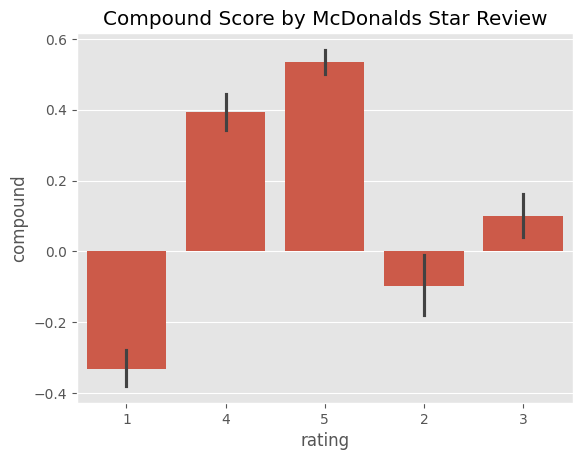

In [99]:
# Plot
ax = sns.barplot(data=vaders_df, x='rating', y='compound')
ax.set_title('Compound Score by McDonalds Star Review')
plt.show()

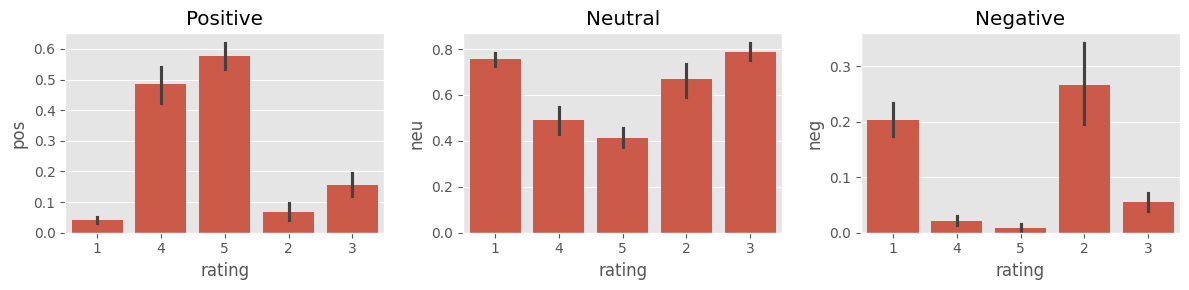

In [100]:
# Subplot
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders_df, x='rating', y='pos', ax=axs[0])
sns.barplot(data=vaders_df, x='rating', y='neu', ax=axs[1])
sns.barplot(data=vaders_df, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# RoBERTa Pretrained Model Sentiment Scoring

In [117]:
# Import libraries
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [118]:
# VADER results on example
print(example)
sia.polarity_scores(example)

Can't believe experience with order taker. Went from drive thru and employee directly asks what do you want. He keeps rushing while taking order with no other cars placing order. We wanted to add one more item and asked for a minute. He keeps asking what else. When I said we are ready - no response. There were no other car placing order that time either. I told again we are ready. responded after a pause. Again what do you want... excuse me.. who talks to customers like this ??
I asked for his name to put a review and he flat out denied. I asked for receipt before handing my credit card. He swipes it and returns back my card. I m waiting for a receipt with my family in the car. He starts inputing another order on his tablet. Waited for sometime and then I waive my hand several times. He opens window and said you can get receipt from next window. Excuse me ??
Went to next window - picked up food, asked for Manager and got his name JAMAR. My receipt states 08/06/2022 7:20pm Order 05
I di

{'neg': 0.035, 'neu': 0.881, 'pos': 0.084, 'compound': 0.6721}

In [47]:
# Import RoBERTa model
from transformers import AutoTokenizer, AutoModelForSequenceClassification

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\LENOVO\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [119]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.7957816, 'roberta_neu': 0.18530126, 'roberta_pos': 0.01891715}


In [137]:
# Def for polartity score RoBERTa
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [138]:
# Looping for dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['review']
        myid = row['reviewer_id']
        
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        
        res[myid] = both
    
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/100 [00:00<?, ?it/s]

Broke for id 63
Broke for id 75


In [186]:
# Results
results_df = pd.DataFrame(res).T
results_df

,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos
1,0.027,0.879,0.094,0.5215,0.962968,0.033356,0.003676
2,0.000,0.791,0.209,0.8687,0.002420,0.021860,0.975720
3,0.051,0.949,0.000,-0.3535,0.784750,0.196340,0.018910
4,0.000,1.000,0.000,0.0000,0.008909,0.220177,0.770914
5,0.143,0.857,0.000,-0.8020,0.929550,0.064213,0.006237
...,...,...,...,...,...,...,...
96,0.136,0.828,0.036,-0.9449,0.943707,0.049216,0.007077
97,0.141,0.811,0.048,-0.7453,0.879507,0.110865,0.009628
98,0.421,0.579,0.000,-0.9455,0.912383,0.078393,0.009224
99,0.000,0.690,0.310,0.6696,0.001445,0.011416,0.987139


# Comparation

In [189]:
# Merge VADER and RoBERTa results
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = pd.merge(df, results_df, left_on='reviewer_id', right_on='Id', how='left')
results_df.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1,1.0,0.027,0.879,0.094,0.5215,0.962968,0.033356,0.003676
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4,2.0,0.000,0.791,0.209,0.8687,0.002420,0.021860,0.975720
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1,3.0,0.051,0.949,0.000,-0.3535,0.784750,0.196340,0.018910
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5,4.0,0.000,1.000,0.000,0.0000,0.008909,0.220177,0.770914
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1,5.0,0.143,0.857,0.000,-0.8020,0.929550,0.064213,0.006237


In [190]:
# Result cleansing
results_df = results_df.drop(columns=(['Id', 'store_name', 'category', 'latitude ', 'longitude', 'review_time', 'store_address']))
results_df = results_df[['reviewer_id', 'review', 'rating_count', 'rating', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound', 'roberta_neg', 'roberta_neu', 'roberta_pos']]
results_df

,reviewer_id,review,rating_count,rating,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos
0,1,Why does it look like someone spit on my food?...,"1,240",1,0.027,0.879,0.094,0.5215,0.962968,0.033356,0.003676
1,2,It'd McDonalds. It is what it is as far as the...,"1,240",4,0.000,0.791,0.209,0.8687,0.002420,0.021860,0.975720
2,3,Made a mobile order got to the speaker and che...,"1,240",1,0.051,0.949,0.000,-0.3535,0.784750,0.196340,0.018910
3,4,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,"1,240",5,0.000,1.000,0.000,0.0000,0.008909,0.220177,0.770914
4,5,"I repeat my order 3 times in the drive thru, a...","1,240",1,0.143,0.857,0.000,-0.8020,0.929550,0.064213,0.006237
...,...,...,...,...,...,...,...,...,...,...,...
95,96,If I could give negative stars I would. This l...,"1,240",1,0.136,0.828,0.036,-0.9449,0.943707,0.049216,0.007077
96,97,When ordering food the employees conveniently ...,"1,240",1,0.141,0.811,0.048,-0.7453,0.879507,0.110865,0.009628
97,98,I donï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,"1,240",1,0.421,0.579,0.000,-0.9455,0.912383,0.078393,0.009224
98,99,Allways has the best Fries and Ice cream in th...,"1,240",5,0.000,0.690,0.310,0.6696,0.001445,0.011416,0.987139


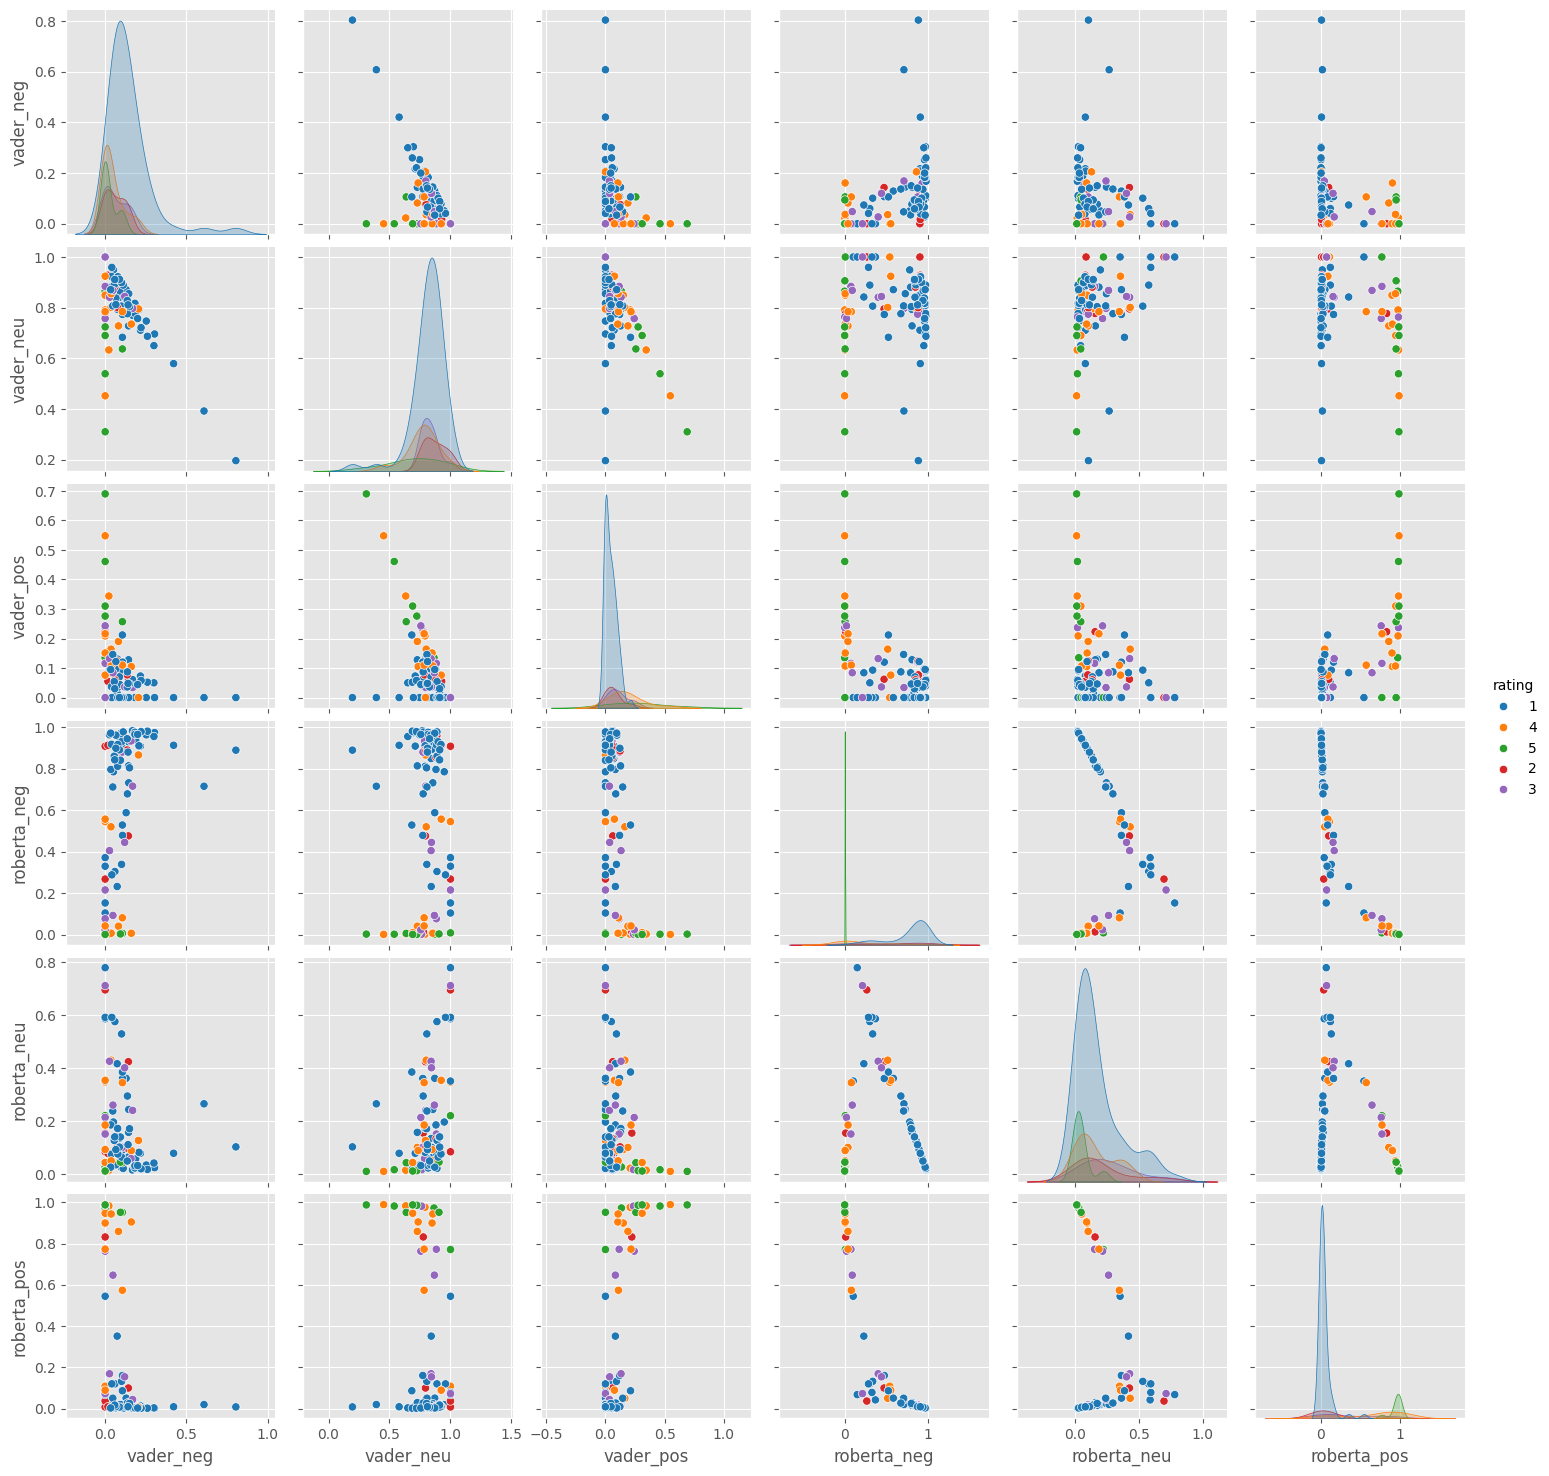

In [191]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='rating',
            palette='tab10')
plt.show()

In [193]:
# Save the results
results_df.to_excel('./dist/results.xlsx', index=False)